In [1]:
import numpy as np
import clmm
import sys
sys.path.append('/pbs/throng/lsst/users/cpayerne/CLMassDC2/modules/')
import analysis_Mass_Richness_relation as analysis
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import edit
import glob
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import time
cosmo = clmm.Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)

In [2]:
ind_profile = edit.load_pickle('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/data_new_version/ind_profile_redmapper.pkl')
#ind_profile_flex = edit.load_pickle('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/data_new_version/ind_profile_redmapper_flex_z.pkl')
#ind_profile_true = edit.load_pickle('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/data_new_version/ind_profile_redmapper_true_z.pkl')

(array([225., 360., 425., 475., 525., 476., 525., 454., 363., 372.]),
 array([0.20149785, 0.29634318, 0.39118853, 0.48603386, 0.58087921,
        0.67572451, 0.77056986, 0.86541522, 0.96026057, 1.05510592,
        1.14995122]),
 <BarContainer object of 10 artists>)

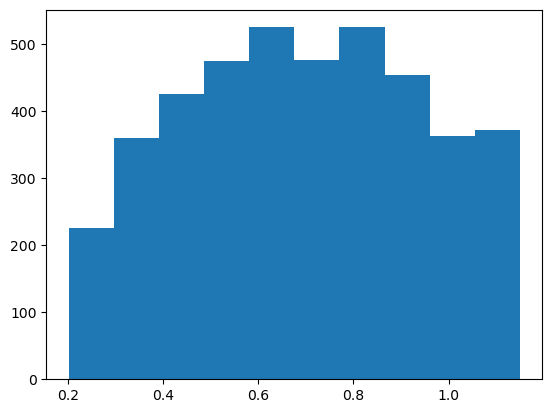

In [33]:
plt.hist(ind_profile['redshift'])

In [65]:
def ds(richness_min, richness_max, zmin, zmax, prf, label):
    mask = (prf['richness'] > richness_min)*(prf['richness'] <richness_max)*(prf['redshift'] < zmax)*(prf['redshift'] > zmin)
    ind_profile_mask = prf[mask]
    ds = ind_profile_mask['DSt' + '_' + label]
    radius = ind_profile_mask['radius' + '_' + label]
    W_L = ind_profile_mask['W_l' + '_' + label]
    print(len(W_L))
    ds_stack = np.average(ds, weights=W_L, axis=0)
    radius_stack = np.mean(radius, axis=0)
    
    return ds, ds_stack, radius_stack

In [71]:
richness_edges = [20, 45]
redshift_edges = [.2, .4]
ds_bpz, ds_stack_bpz, radius_stack_bpz = ds(richness_edges[0], richness_edges[1], redshift_edges[0], redshift_edges[1], ind_profile, 'bpz')
ds_flex, ds_stack_flex, radius_stack_flex = ds(richness_edges[0], richness_edges[1], redshift_edges[0], redshift_edges[1], ind_profile, 'flex')
ds_true, ds_stack_true, radius_stack_true = ds(richness_edges[0], richness_edges[1], redshift_edges[0], redshift_edges[1], ind_profile, 'true')

richness_edges = [20, 45]
redshift_edges = [.8, 1]
ds_bpz, ds_stack_bpz1, radius_stack_bpz = ds(richness_edges[0], richness_edges[1], redshift_edges[0], redshift_edges[1], ind_profile, 'bpz')
ds_flex, ds_stack_flex1, radius_stack_flex = ds(richness_edges[0], richness_edges[1], redshift_edges[0], redshift_edges[1], ind_profile, 'flex')
ds_true, ds_stack_true1, radius_stack_true = ds(richness_edges[0], richness_edges[1], redshift_edges[0], redshift_edges[1], ind_profile, 'true')

485
485
485
813
813
813


In [72]:
ds_stack_bpz

array([6.43671415e+13, 5.68514086e+13, 4.49664179e+13, 3.50890779e+13,
       2.95146846e+13, 2.50311113e+13, 1.76487778e+13, 1.37081531e+13,
       9.97624402e+12, 7.61335219e+12, 5.10534199e+12, 4.36286241e+12,
       3.55033268e+12, 3.00896748e+12, 2.30750879e+12])

In [73]:
ds_stack_true

array([6.43920564e+13, 5.68179722e+13, 4.47992828e+13, 3.50050395e+13,
       2.95338935e+13, 2.49263422e+13, 1.75695047e+13, 1.36983704e+13,
       9.96117967e+12, 7.64312577e+12, 5.06145598e+12, 4.32445710e+12,
       3.56439011e+12, 3.01731738e+12, 2.29052301e+12])

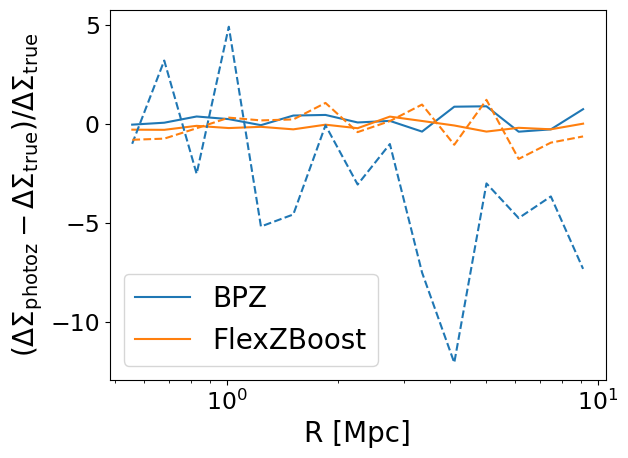

In [77]:
plt.plot(radius_stack_bpz, 100*(ds_stack_bpz-ds_stack_true)/ds_stack_true, 'C0', label='BPZ')
#plt.plot(radius_stack_true, ds_stack_true)
plt.plot(radius_stack_flex, 100*(ds_stack_flex-ds_stack_true)/ds_stack_true, 'C1', label='FlexZBoost')
plt.plot(radius_stack_bpz, 100*(ds_stack_bpz1-ds_stack_true1)/ds_stack_true1, 'C0--' )
#plt.plot(radius_stack_true, ds_stack_true)
plt.plot(radius_stack_flex, 100*(ds_stack_flex1-ds_stack_true1)/ds_stack_true1, 'C1--')
plt.legend(fontsize=20)
plt.xscale('log')
plt.xlabel('R [Mpc]', fontsize=20)
plt.tick_params(axis='both', which = 'both', labelsize= 17)
#axs[i, j].legend(frameon = False, loc = 'upper right', fontsize = 10)
plt.ylabel(r'$(\Delta\Sigma_{\rm photoz}-\Delta\Sigma_{\rm true})/\Delta\Sigma_{\rm true}$', fontsize=20)
plt.savefig('photoz_effect_on_deltasigma', bbox_inches='tight', dpi=300)

[0.2, 0.375, 0.55, 0.7249999999999999, 0.9]
249
249
249
474
474
474
553
553
553
546
546
546
144
144
144
230
230
230
236
236
236
246
246
246
59
59
59
100
100
100
111
111
111
105
105
105
16
16
16
31
31
31
44
44
44
23
23
23


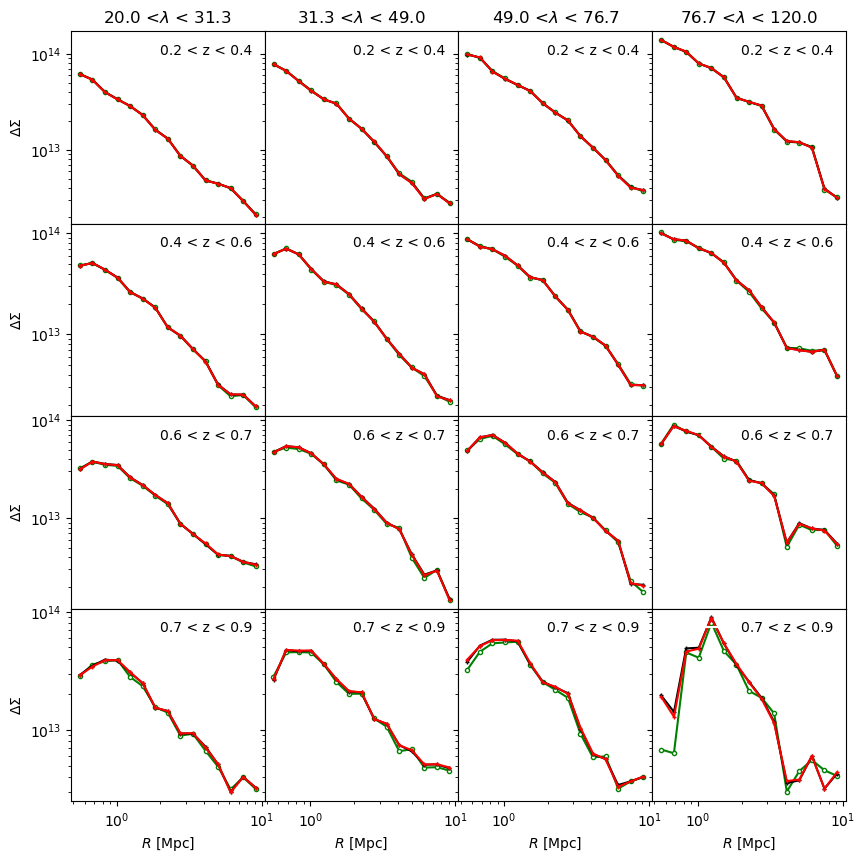

In [4]:
Z_bin = analysis.Z_bin
Richness_bin = analysis.Obs_bin
Nr=len(Richness_bin)
Nz=len(Z_bin)
#richness_edges = np.logspace(np.log10(20), np.log10(200), Nr+1)
#redshift_edges = np.linspace(0.2, .8, Nz+1)

redshift_edges = [Z_bin[i][0] for i in range(len(Z_bin))]
redshift_edges.append(Z_bin[-1][1])
richness_edges = [Richness_bin[i][0] for i in range(len(Richness_bin))] 
richness_edges.append(Richness_bin[-1][1])
print(redshift_edges)
fig, ax = plt.subplots(Nz,Nr, figsize=(10,10), sharex=True, sharey='row')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
moo = clmm.Modeling (massdef = 'critical', delta_mdef = 200, halo_profile_model = 'einasto')
moo.set_cosmo(cosmo)
moo.set_concentration (4)
for i in range(Nr):
    ax[0,i].set_title(f'{richness_edges[i]:.1f} <' + r'$\lambda$' +  f' < {richness_edges[i+1]:.1f}', fontsize=12)
    ax[Nz-1, i].set_xlabel(r'$R$ [Mpc]')
    for j in range(Nz):
        ax[j, 0].set_ylabel(r'$\Delta\Sigma$')
        try:
            ax[j,i].plot([], [], 'w', label=f'{redshift_edges[j]:.1f} < z < {redshift_edges[j+1]:.1f}' )
            ds_bpz, ds_stack_bpz, radius_stack_bpz = ds(richness_edges[i], richness_edges[i+1], redshift_edges[j], redshift_edges[j+1], ind_profile, 'bpz')
            ax[j,i].errorbar(radius_stack_bpz, ds_stack_bpz, 0*np.std(ds_bpz, axis=0)/np.sqrt(len(ds_bpz)-1),  fmt='-', 
                 capsize=0, marker='o', markerfacecolor='w', markersize=3, barsabove=True, color='g')
            ds_true, ds_stack_true, radius_stack_true = ds(richness_edges[i], richness_edges[i+1], redshift_edges[j], redshift_edges[j+1], ind_profile, 'true')
            ax[j,i].errorbar(radius_stack_true, ds_stack_true, 0*np.std(ds_true, axis=0)/np.sqrt(len(ds_true)-1),  fmt='-', 
                 capsize=0, marker='+', markerfacecolor='w', markersize=3, barsabove=True, color='k')
            ds_flex, ds_stack_flex, radius_stack_flex = ds(richness_edges[i], richness_edges[i+1], redshift_edges[j], redshift_edges[j+1], ind_profile, 'flex')
            ax[j,i].errorbar(radius_stack_flex, ds_stack_flex, 0*np.std(ds_flex, axis=0)/np.sqrt(len(ds_flex)-1),  fmt='-', 
                 capsize=0, marker='+', markerfacecolor='w', markersize=3, barsabove=True, color='r')
            ax[j,i].loglog()
            #moo.set_mass (10**np.mean([logm_edges[i], logm_edges[i+1]]))
            #ax[j,i].plot(radius_stack, moo.eval_excess_surface_density(radius_stack, np.mean([redshift_edges[j], redshift_edges[j+1]]))) 
            ax[j,i].legend(loc='upper right', frameon=False)
        except: a=1
            #ax[j,i].set_ylim(3e12, 2e14)
        #ax[j,i].set_xscale('log')
#plt.savefig('DeltaSigma_Stacking_redmapper.png', bbox_inches='tight', dpi=300)

In [5]:
redmapper_cat = np.load('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/lens_catalog_cosmoDC2_v1.1.4_redmapper_v0.8.1.pkl', allow_pickle=True)

In [6]:
zmin = .9

In [7]:
l = glob.glob('/sps/lsst/users/cpayerne/CLMassDC2/cosmoDC2/redmapper_clusters_new/lensing_catalog_halo*')

In [8]:
len(l)

4200

In [9]:
cat =l[int(np.random.random()*400)]

In [10]:
index = int(cat.split('.')[0].split('_')[5])

In [11]:
t = np.load(cat, allow_pickle=True)

In [12]:
z = 1
lens = redmapper_cat[redmapper_cat['redshift'] > z]

In [13]:
lens

dec,richness_err,richness,ra,cluster_id,redshift_err,redshift
float64,float32,float32,float64,int32,float32,float32
-26.7172081871169,2.4172914,124.02715,56.99849698116052,24,0.0065176566,1.040338
-27.896589555863095,2.2175314,76.85877,54.494027152041674,116,0.0070620407,1.0629631
-27.199784884537003,2.26323,75.89771,58.137368555958155,133,0.0069939015,1.037697
-27.54965595251503,2.411495,73.22809,56.70614163063158,151,0.008977199,1.0760663
-27.61967655716678,2.1913095,68.956696,54.58753782949982,166,0.0074558402,1.0685551
-27.19835952759372,2.2308278,47.9506,57.53387076932409,563,0.00797376,1.0574311
-27.38575526574132,2.1680841,40.9028,56.995796963403045,671,0.011380441,1.0732634
-26.808226100303234,2.076445,35.83815,57.8578001189056,1049,0.007903222,1.0227844
-27.878842421298398,2.1031466,37.394157,57.301200545891994,1064,0.007826576,1.028338


In [14]:
index=0
zlim = 1.1
lens = redmapper_cat[redmapper_cat['redshift'] > zlim]
index=0
zcl = lens['redshift'][index]
index = lens['cluster_id'][index]
file = f'/sps/lsst/users/cpayerne/CLMassDC2/cosmoDC2/redmapper_clusters_new/lensing_catalog_halo_{index}.pkl'
t = np.load(file, allow_pickle=True)

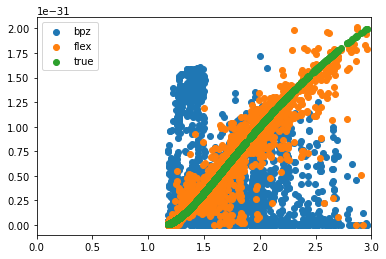

In [15]:
plt.scatter(t['z'], 1/(t['sigmac_photoz_bpz']**2), label='bpz')
plt.scatter(t['z'], 1/(t['sigmac_photoz_flex']**2), label='flex')
plt.scatter(t['z'], 1/(cosmo.eval_sigma_crit(zcl, t['z'])**2), label='true')
plt.xlim(0, 3)
plt.legend()

In [16]:
a = ['a', 'b']

In [17]:
a+a

['a', 'b', 'a', 'b']

In [18]:
b = [a[i] + ]

SyntaxError: invalid syntax (<ipython-input-18-714b455ac351>, line 1)